# **SME0142 - Álgebra Linear e Aplicações**

## **Trabalho Final**

### **Docente: Maria Luísa Bambozzi de Oliveira**

## Grupo:  
João Pedro Hamata - 13672001 <br>
Leonardo Ishida - 12873424

## Link para o vídeo: https://drive.google.com/file/d/1by_ipiM4ZKbxBjUAKYyhHfjRRXRAX4Zl/view?usp=sharing

# SVD

A Decomposição em Valores Singulares (SVD) é uma técnica de álgebra linear que expressa uma matriz como o produto de três outras matrizes.

A SVD pode ser utilizada, entre outros fins, para redução de dados por meio da seleção de um número menor de valores singulares e de seus correspondentes vetores singulares associados, numa técnica conhecida como Truncagem da SVD e é especialmente útil quando se deseja representar a matriz original com uma quantidade menor de informação, reduzindo assim a dimensionalidade dos dados.

A SVD de uma matriz A de dimensões m×n é dada por:

A = UΣV^T

onde:

    U é uma matriz m×m cujas colunas são os vetores singulares à esquerda,
    Σ é uma matriz diagonal m×n contendo os valores singulares,
    V^T é a transposta de uma matriz n×n cujas colunas são os vetores singulares à direita.

Os valores singulares (σi​) na diagonal de Σ são ordenados em ordem decrescente, e os vetores singulares em U e V são normalizados. A representação completa da matriz A pode ser aproximada truncando a SVD para manter apenas os r valores singulares mais significativos.

A truncagem da SVD é realizada mantendo apenas as primeiras r colunas de U e V, bem como as r×r submatrizes diagonais de Σ. A matriz original A pode então ser aproximada como:

A_r = U_r​Σ_rV_r^T​

onde:

    U_r​ é uma matriz m×r,
    Σ_r​ é uma matriz diagonal r×r,
    V_r^T​ é a transposta de uma matriz r×n.

Ao escolher um valor r menor que o número de colunas originais de A, é possível reduzir a dimensionalidade do conjunto de dados, sendo especialmente útil quando os valores singulares diminuem rapidamente em magnitude, indicando que as contribuições dos modos associados a esses valores singulares são relativamente pequenas.

---

# Importação de Bibliotecas:

Nesta seção, são importadas bibliotecas necessárias, como NumPy para manipulação numérica, Matplotlib para visualização de dados e imagens, e outras bibliotecas específicas para processamento de imagens.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.patches as patches
import skimage.draw
import skimage.transform
import urllib
import PIL

# Definição de Funções Úteis:

São definidas funções auxiliares que serão utilizadas ao longo do programa, como plotagem de matrizes, criação de matrizes aproximadas com base nos componentes da SVD e plotagem de valores singulares.

In [ ]:
def plot_matriz(matriz):
    img = plt.imshow(matriz)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

def criar_matriz_r(u, s, vt, r):
    return u[:, :r] @ np.diag(s[:r]) @ vt[:r, :]

def plot_val_sing(s, r, linhas, corte):
    fig1,ax1 = plt.subplots(1)

    ax1.semilogy(s,'-o', color='k')
    ax1.semilogy(np.diag(s[:r]),'o', color='r')
    ax1.plot(np.array([-20, linhas+20]),np.array([corte, corte]),'--', color='r')
    plt.xlim((-10,600))
    plt.ylim((0.003,1000))
    ax1.grid()
    plt.show()


# Lendo a imagem e transformando-a em escala de cinza

A imagem é lida e convertida para escala de cinza, sendo plotada em seguida.

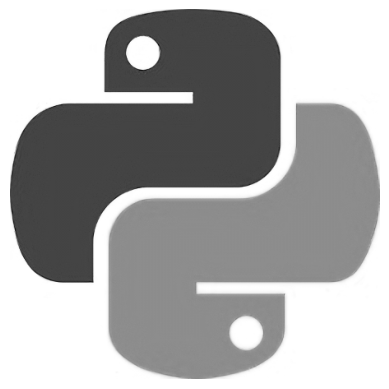

In [ ]:
# Obtendo a imagem

url = 'https://raw.githubusercontent.com/LeonardoIshida/img-trab-alglin/main/python2-transformed2.png'
X = np.array(PIL.Image.open(urllib.request.urlopen(url)))

# Transformando em escala de cinza

X_monocromatico = np.mean(X, -1)
plot_matriz(X_monocromatico)

# Decomposição da Imagem com SVD:

A imagem em escala de cinza é decomposta utilizando a SVD, resultando nas matrizes U, Σ (valores singulares) e V^T (transposta da matriz de vetores próprios).

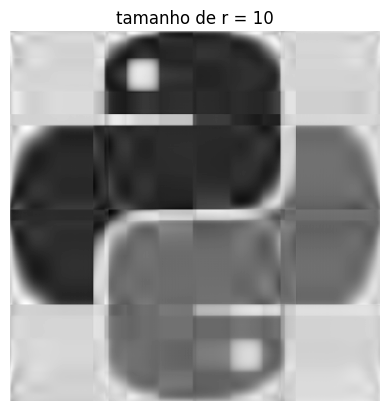

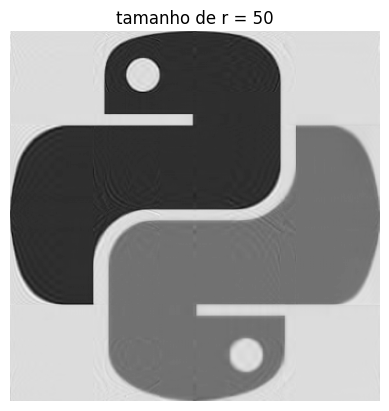

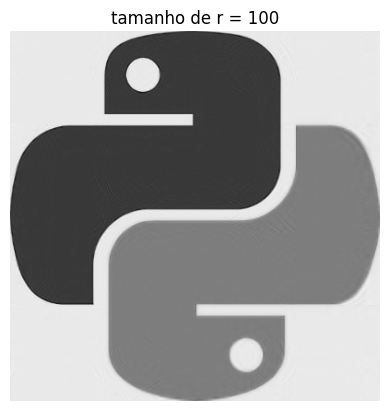

In [ ]:
u, s, vt = np.linalg.svd(X_monocromatico, full_matrices=False)

# Queremos que nossas matrizes tenham dimensoes de ate r para economizar no espaco de armazenamento
k = 0
for r in [10, 50, 100]: # escolhendo tamanhos aleatórios para 'r'
    aprox = criar_matriz_r(u, s, vt, r)

    # incrementando a quantidade de objetos a serem impressos

    plt.figure(k+1)
    k += 1

    # impressao da matriz

    plt.title(f'tamanho de r = {r}')
    plot_matriz(aprox)


# Encontrando 'r' ideal para matrizes de posto baixo

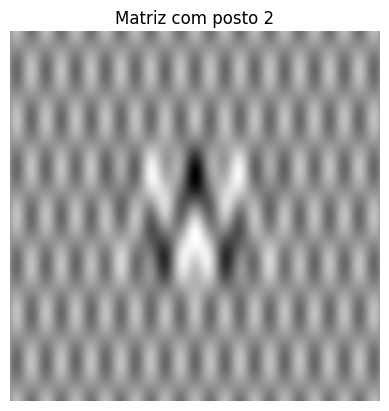

In [ ]:
# Criando uma imagem sintética de posto baixo para ser utilizada abaixo

t = np.arange(-3,3,0.01)

u = np.array([np.sin(2*t) * np.exp(-t**2), np.cos(4*t)]).T
s = np.array([[2, 0],[0, 0.5]])
vt = np.array([np.cos(5*t) * np.exp(-t**2), np.cos(13*t)]).T

# Construindo a matriz

X = u @ s @ vt.T

# Plotando a matriz criada

plt.title(f'Matriz com posto {np.linalg.matrix_rank(X)}')
plot_matriz(X)

# Criando imagem com ruído
X_ruído = X + γX <br>
γ é uma variável gaussiana, centrada em zero <br>
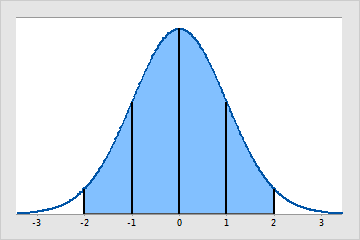

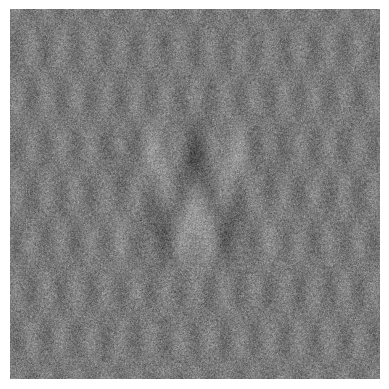

In [ ]:
# Quanto maior o valor do desvio padrão, mais informações nossa matriz vai ter, o que afetará nossa decomposição SVD
# recomendamos valores até 1, pois o nosso ruído é uma variável aleatória que segue distribuição gaussiana
# valores maiores que isso, podem gerar muito ruído

# Construindo a matriz com ruído

desvio_padrao = 1.0 * 1
X_ruido = X + desvio_padrao * np.random.randn(*X.shape)

# Fazendo a decomposição SVD da matriz ruído

ur, sr, vtr = np.linalg.svd(X_ruido, full_matrices=False)
linhasR, colunasR = X_ruido.shape

# Plotando a matriz ruído

plot_matriz(X_ruido)

# Utilizando 90% dos valores singulares

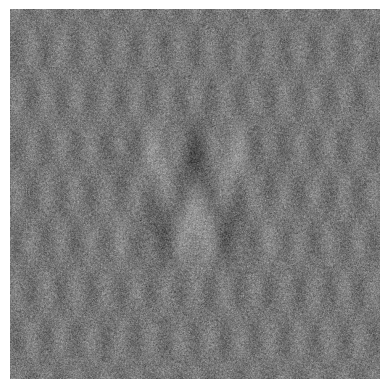

In [ ]:
total = np.sum(sr) # soma total dos valores de sigma
r = 0
porcent = 0

for valor_sing in sr:
    if (porcent/total) >= 0.9:
        break

    porcent += valor_sing  # somando os valores de sigma
    r += 1 # acrescentando os valores de r

# Contruindo a matriz

X_rec = criar_matriz_r(ur, sr, vtr, r)

# Plotando a matriz

plot_matriz(X_rec)

# Utilizando corte para selecionar valores singulares
## Equação do corte:
c = ($4$$/$$\sqrt{3}$) * $\sqrt{linhas}$ * desvio_padrão

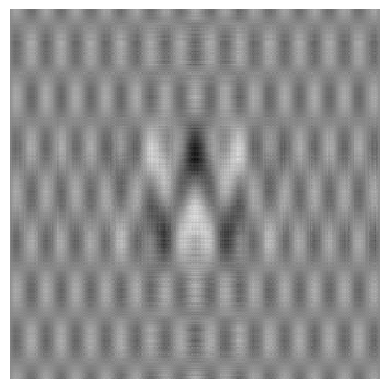

In [ ]:
# Calculando o valor do corte

corte = (4/np.sqrt(3)) * np.sqrt(linhasR) * desvio_padrao


# Selecionando os valores de 'r' acima do corte

r_otimo = 0
for valores in sr:
    if valores > corte:
        r_otimo += 1

# Construindo a matriz com 'r' ótimo

X_reconstruido = criar_matriz_r(ur, sr, vtr, r_otimo+1)

# Plotando a imagem com 'r' ótimo

plot_matriz(X_reconstruido)

# A maioria da imagens têm os valores singulares decompostos da seguinte maneira
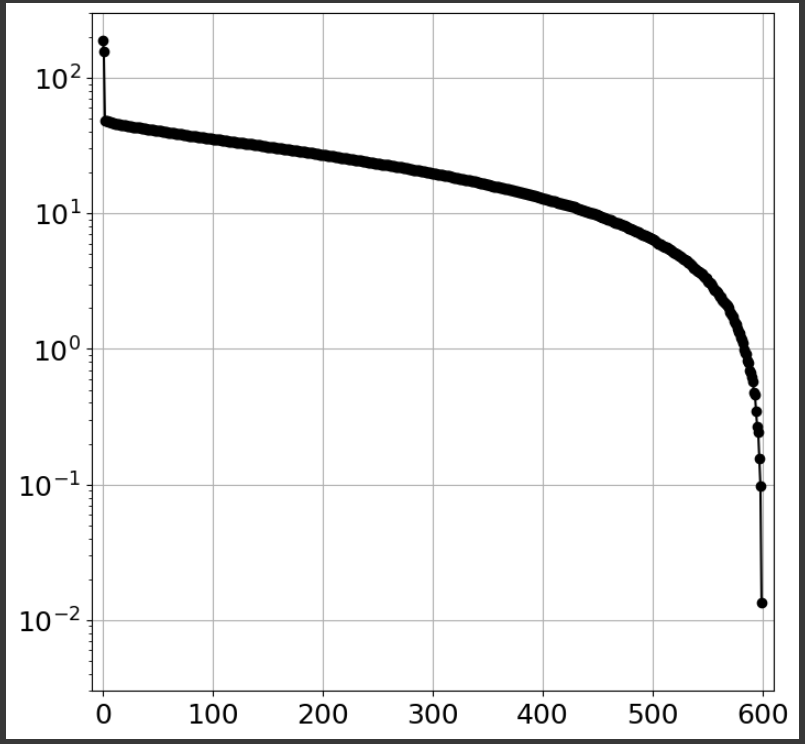


# Os valores singulares abaixo do corte carregam muito ruído, então não inserimos na nossa imagem

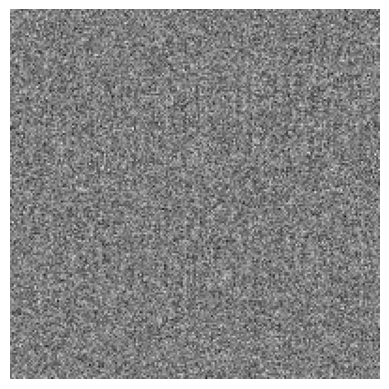

In [ ]:
# Construindo a imagem com todos os valores singulares que não passaram pelo corte

ubaixo = ur[r+1:]
sbaixo = sr[r+1:]
vtbaixo = vtr[r+1:].T

# Criando a matriz

X_baixo = criar_matriz_r(ubaixo, sbaixo, vtbaixo, len(sbaixo))

# Plotando a matriz

plot_matriz(X_baixo)

# Plotando valores singulares da imagem com ruído
Os valores singulares em vermelho são os escolhidos para representar nossa imagem

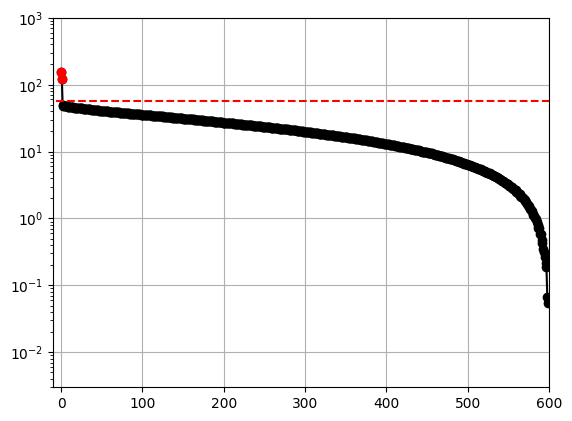

In [ ]:
# Utilizando a técnica do corte

plot_val_sing(sr, r_otimo, linhasR, corte)

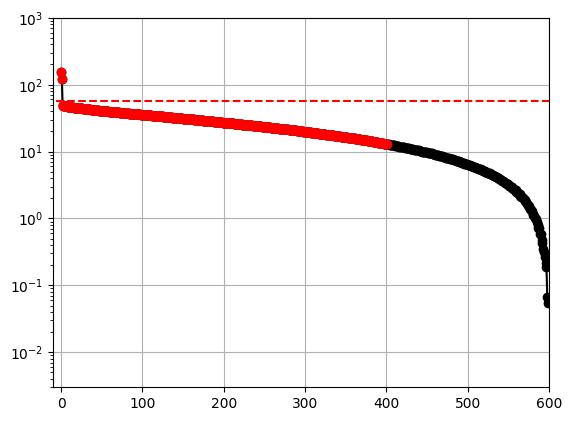

In [ ]:
# Utilizando 90% da soma total dos valores singulares

plot_val_sing(sr, r, linhasR, corte)

# Caso em que a imagem não é quadrada

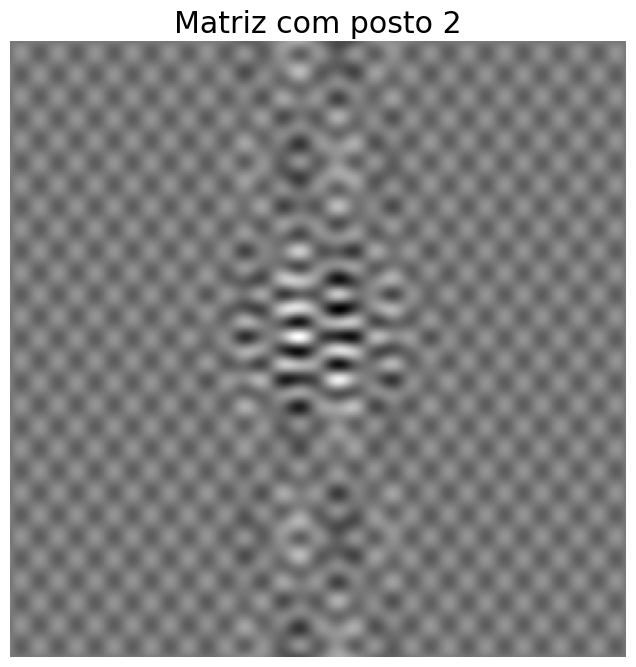

In [ ]:
# Vamos usar, novamente, uma imagem sintética para evitar o problema de ter um posto alto

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

t = np.arange(-4,4,0.02)

uy = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t), np.sin(9*t)*np.cos(7*t)]).T
sy = np.array([[2, 0],[0, 0.5], [1, 0]])
vty = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

# Construindo a imagem

Y = uy @ sy @ vty.T

# Plotando a imagem criada
plt.title(f'Matriz com posto {np.linalg.matrix_rank(Y)}')
plot_matriz(Y)

# Calculando a nova matriz com ruído

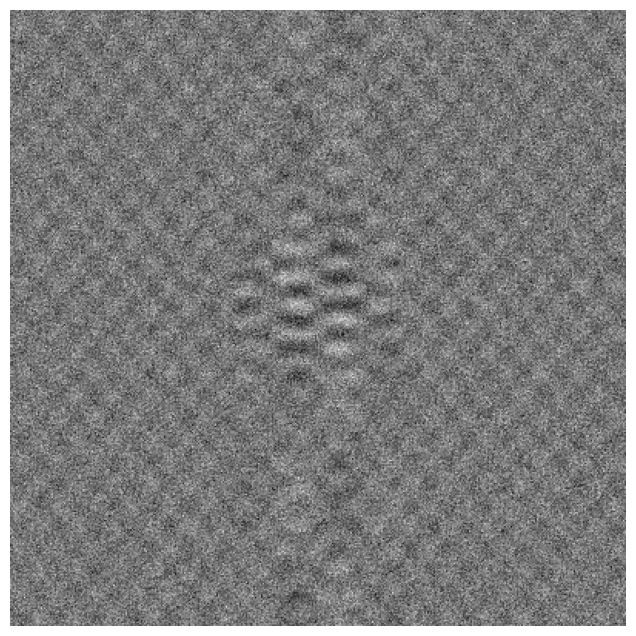

In [ ]:
# Gerando a imagem com ruído

desvio_padrao = 0.20 * 5
Y_ruido =  Y + desvio_padrao * np.random.randn(*Y.shape)

# Plotando a matriz com ruído

plot_matriz(Y_ruido)

# Utilizando o corte para determinar o r ótimo
## Equação do corte para matrizes não quadradas
## c($B$) = $\sqrt{2(B + 1) + \frac{8B}{(B-1) + (B^2 + 14B +1)^{1/2}}}$
## $B$ = colunas / linhas

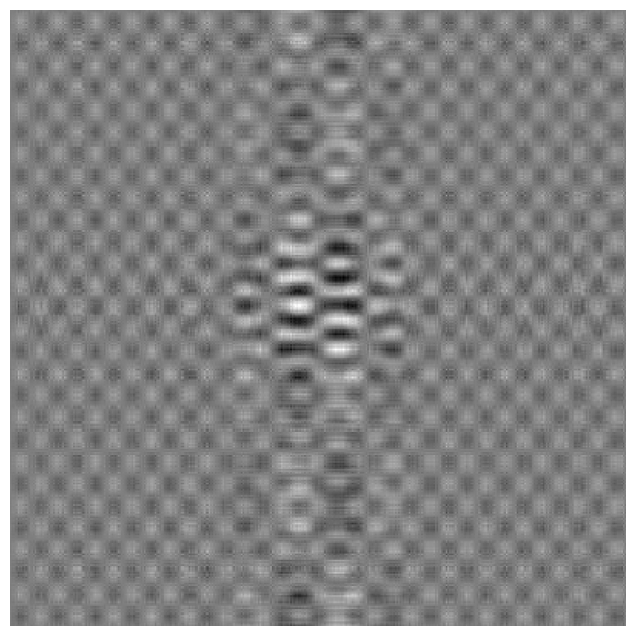

In [ ]:
# Calculando o corte

linhas_y, colunas_y = Y.shape
beta = colunas_y / linhas_y
lambda_beta = np.sqrt(2*(beta+1) + (8*beta)/((beta+1) * np.sqrt( (beta**2) + (14*beta) + 1)))

# Fazendo a decomposição SVD da imagem com ruído

uyr, syr, vtyr = np.linalg.svd(Y_ruido)
corte2 = lambda_beta * desvio_padrao * np.sqrt(linhas_y)

# Selecionando os valores de sigma cima do corte

r = 0
for valores in syr:
    if valores > corte2:
        r += 1

# Plotando a imagem com 'r' ótimo

y_reconstruido = criar_matriz_r(uyr, syr, vtyr, r+1)
plot_matriz(y_reconstruido)

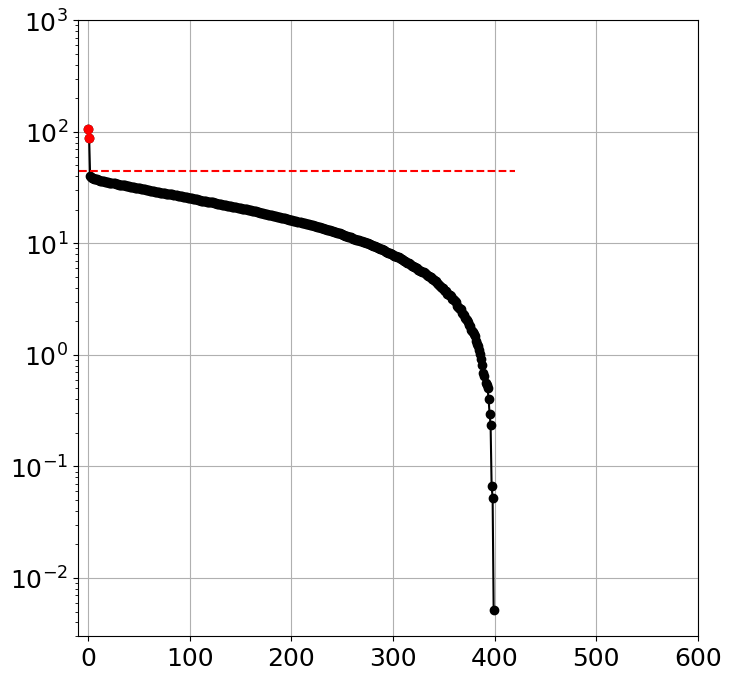

In [ ]:
# Plotando os valores singulares da imagem não quadrada

plot_val_sing(syr, r, linhas_y, corte2)

# Rotação de Imagem e SVD, uma demonstração prática da importânica de alinhamento e rotação:

A influência de alinhamento e rotação para a redução de dados usando a Singular Value Decomposition (SVD) pode ser entendida observando como essas transformações afetam a distribuição dos valores singulares e dos vetores singulares.

Alinhamento e SVD:

    Alinhamento dos Dados:
        Quando os dados estão perfeitamente alinhados aos eixos principais, os vetores singulares à esquerda (U) e à direita (V) podem capturar eficientemente a variação dos dados.
        Nesse caso, muitos dos valores singulares podem ser pequenos, indicando que uma redução de dimensionalidade é possível mantendo apenas alguns poucos componentes significativos.

    Desalinhamento dos Dados:
        Se os dados não estão alinhados aos eixos principais, isso pode resultar em uma maior complexidade na representação dos dados. Isso pode ser refletido em valores singulares maiores, indicando que mais componentes são necessários para capturar a mesma quantidade de variação dos dados.

Rotação e SVD:

    Rotação dos Dados:
        A rotação dos dados pode causar uma mistura das características originais, dificultando a representação eficiente por meio de poucos componentes.
        Valores singulares maiores podem ser necessários para reconstruir a imagem original com a mesma qualidade, uma vez que a rotação pode introduzir correlações mais complexas e padrões que exigem mais informações para serem representados.

    Alta Sensibilidade à Orientação:
        A SVD é sensível à orientação dos dados. Mudanças na orientação podem aumentar a importância de certos modos de variação, aumentando assim os valores singulares correspondentes.

Em resumo, a teoria por trás dessa explicação reside na análise das propriedades geométricas dos dados por meio dos vetores singulares e valores singulares, e como mudanças no alinhamento ou rotação podem afetar esses elementos, exigindo potencialmente mais componentes para manter a qualidade da representação dos dados originais.

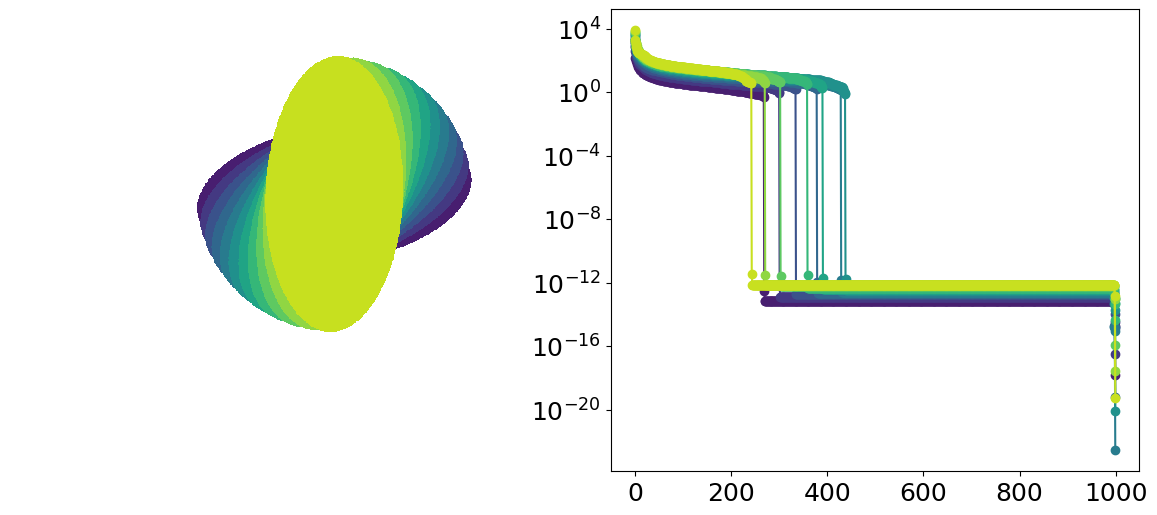

In [ ]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams.update({'font.size': 18})

n = 1000
q = int(n / 4)
X = np.zeros((n, n))

# Translação da elipse para a direita e para baixo
trans_x = int(0.5 * n) - q
trans_y = int(0.5 * n) - (q + int(0.1 * n))
rr, cc = skimage.draw.ellipse(q + trans_y, q + trans_x + int(0.2 * n), q*1.2, q*0.6, rotation=np.pi/2)
X[rr, cc] = 1

nAngles = 24  # Aumenta o intervalo para até 90 graus
cm_np = plt.cm.viridis

fig, axs = plt.subplots(1, 2)

# Calcula o centro da elipse
center_y, center_x = np.mean(rr), np.mean(cc)

for j in range(0, nAngles, 2):
    Xrot = skimage.transform.rotate(X, j * 4.0, center=(center_x, center_y))  # Rotação em relação ao centro
    Xrot[np.nonzero(Xrot)] = j

    U, S, VT = np.linalg.svd(Xrot)

    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot), vmin=0, vmax=nAngles, cmap=cm_np)
    axs[0].axis('off')

    axs[1].semilogy(S, '-o', color=cm_np(j/nAngles))
    axs[1].grid()

plt.show()

# Redes Neurais em comparação com SVD

Redes Neurais Convolucionais (CNNs) são uma classe especializada de redes neurais projetadas para processar dados bidimensionais, como imagens e vídeos. Compostas por camadas convolucionais, de pooling e totalmente conectadas, as CNNs destacam-se por sua capacidade de automaticamente aprender hierarquias de características espaciais, tornando-as eficazes em tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação semântica. A convolução permite que a rede capture padrões locais, enquanto as camadas de pooling reduzem a dimensionalidade e aumentam a invariância a translações e rotações.

# Referências
https://ieeexplore.ieee.org/document/6846297 <br>
Brunton, Steven L; Kutz, J. Nathan. Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control